<a href="https://colab.research.google.com/github/luccidomingues/Unsupervised-Machine-Learning-Kmeans/blob/main/Rotten_Tomatoes_Movies_Unsupervised_Machine_Learning_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv("Rotten Tomatoes Movies.csv")
movies.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [ ]:
movies.shape

(16638, 17)

###Removendo espaços em branco da coluna genre

In [ ]:
movies['genre'] = movies['genre'].str.replace(', ',',')
movies['genre'] = movies['genre'].str.replace(' ,',',')

### Get_dummies

In [ ]:
genre = movies.genre.str.get_dummies(sep=',')
genre.shape


(16638, 21)

###Concatenando

In [ ]:
movies_conc = pd.concat([movies, genre], axis=1)
movies_conc.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure,Comedy,Drama,Science Fictio...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies_conc.shape

(16638, 38)

### Escalando para posterior agrupamento

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_genre = scaler.fit_transform(genre)

scaler_genre.shape

array([[ 1.99050835, -0.18748898, -0.03003938, ..., -0.10310139,
        -0.12550265, -0.13154306],
       [-0.50238423, -0.18748898, -0.03003938, ..., -0.10310139,
        -0.12550265, -0.13154306],
       [-0.50238423, -0.18748898, -0.03003938, ..., -0.10310139,
        -0.12550265, -0.13154306],
       ...,
       [ 1.99050835, -0.18748898, -0.03003938, ..., -0.10310139,
        -0.12550265, -0.13154306],
       [-0.50238423, -0.18748898, -0.03003938, ..., -0.10310139,
        -0.12550265, -0.13154306],
       [ 1.99050835, -0.18748898, -0.03003938, ..., -0.10310139,
        -0.12550265, -0.13154306]])

## Fazendo os agrupamentos

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3)

model.fit(scaler_genre)

print(f'Groups {model.labels_}')

Groups [0 0 0 ... 0 0 0]


In [ ]:
print(genre.columns)
print(model.cluster_centers_)

Index(['Action & Adventure', 'Animation', 'Anime & Manga',
       'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
       'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
       'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western'],
      dtype='object')
[[ 4.40419685e-02 -1.87488982e-01 -3.00393774e-02  2.07651314e-02
   4.79315868e-02  7.34786646e-02  9.48325876e-03 -3.57643510e-01
   1.44059944e-01 -2.81040126e-02  2.69461600e-03  5.81760983e-02
  -7.25709963e-02 -8.71205624e-02  8.25778838e-02  5.65648908e-02
   2.06608434e-02 -2.55294210e-01 -5.92666154e-02 -5.08185221e-02
   2.16141638e-02]
 [-4.48354803e-01 -1.87488982e-01 -3.00393774e-02 -1.11795962e-01
  -2.77251790e-01 -5.63567720e-01 -5.16761779e-02  2.62510597e+00
  -7.93963361e-01  2.11761480e-01 -8.58501479e-04 -3.27926333e-01
  -1.91820821e-01  5.9

###Agrupando em Dataframe

In [ ]:
group = pd.DataFrame(model.cluster_centers_,
            columns=genre.columns)

group

,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,0.044042,-0.187489,-0.030039,0.020765,0.047932,0.073479,0.009483,-0.357644,0.144060,-0.028104,0.002695,0.058176,-0.072571,-0.087121,0.082578,0.056565,0.020661,-0.255294,-0.059267,-0.050819,0.021614
1,-0.448355,-0.187489,-0.030039,-0.111796,-0.277252,-0.563568,-0.051676,2.625106,-0.793963,0.211761,-0.000859,-0.327926,-0.191821,0.599755,-0.463791,-0.326376,-0.317393,1.848519,0.450254,0.347704,-0.119849
2,0.475393,5.323892,0.852991,-0.124975,-0.221188,0.146556,-0.054902,-0.299874,-0.802638,-0.042766,-0.064061,-0.298550,2.478715,0.066148,-0.429675,-0.263880,0.598299,-0.125224,-0.103101,0.046090,-0.117879


###Primeiro fazendo a transposição e depois plotando

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7526898890>,
      dtype=object)

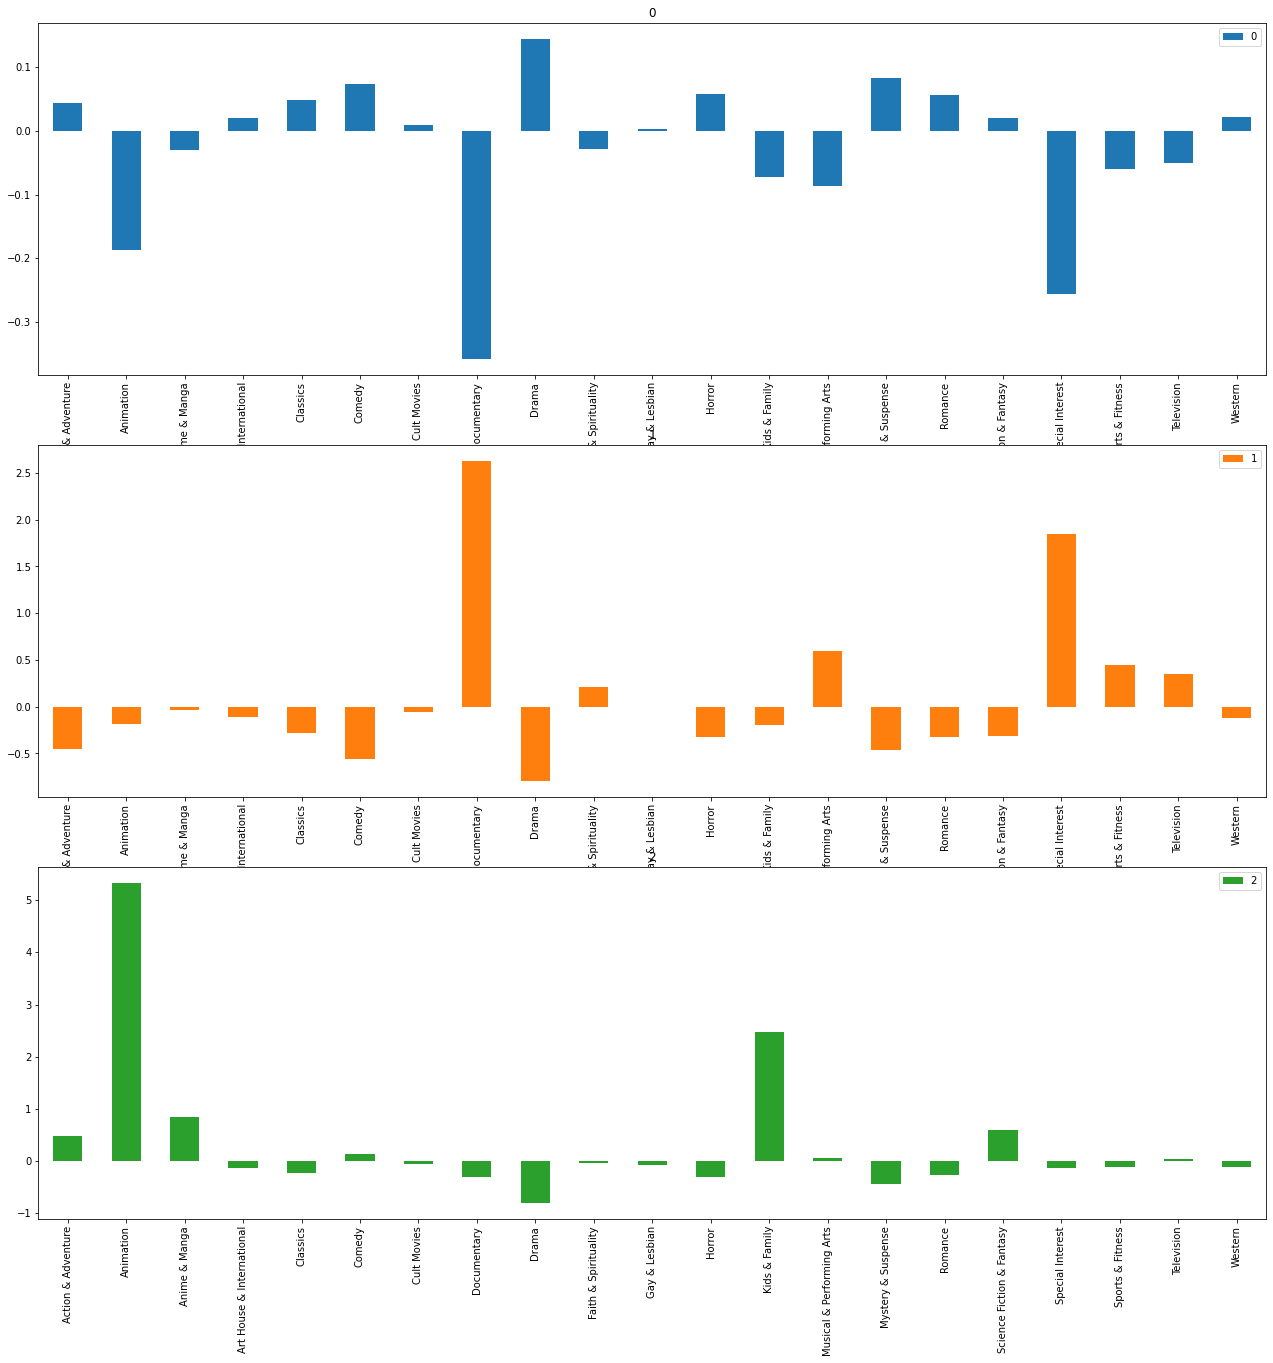

In [ ]:
group.transpose().plot.bar(subplots=True,
               figsize=(22, 22),
               sharex=False)

###Fazendo um filtro de samples

In [ ]:
grupo = 2

filt = model.labels_ == grupo

movies_conc[filt].sample(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
15416,Toy Story 3,"""Toy Story 3"" welcomes Woody, Buzz and the who...","Deftly blending comedy, adventure, and honest ...",G,"Animation,Comedy,Kids & Family",Lee Unkrich,"Lee Unkrich, Andrew Stanton, John Lasseter, Mi...","Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",2010-06-18,2010-11-02,103.0,Walt Disney Pictures,Certified Fresh,98,305,89.0,606931.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2152,A Turtle's Tale: Sammy's Adventures,nWave Pictures presents this animated adventur...,NaN,PG,"Action & Adventure,Animation,Kids & Family",Ben Stassen,Domonic Paris,"Petrus Kähkönen, Ed Begley Jr., Tuomas Uusital...",NaN,2012-02-06,88.0,nWave Pictures,Rotten,44,18,47.0,2840.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3882,Brother Bear 2,An old friendship is renewed and new bonds are...,NaN,G,"Animation,Kids & Family","Ben Gluck, Benjamin Gluck",Rich Burns,"Patrick Dempsey, Mandy Moore, Jeremy Suarez, R...",2006-08-29,2006-08-29,73.0,Walt Disney Home Entertainment,Rotten,50,8,56.0,24353.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4372,Cinderella,This Disney animated version of Cinderella too...,"The rich colors, sweet songs, adorable mice an...",G,"Animation,Classics,Kids & Family,Science Ficti...","Clyde Geronimi, Wilfred Jackson, Hamilton Luske","Ken Anderson, Bill Peet, Erdman Penner, Ted Se...","Ilene Woods, Eleanor Audley, Verna Felton, Wil...",1950-02-15,2005-10-04,74.0,Walt Disney Pictures,Fresh,97,33,80.0,862072.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3109,Battle For Terra,When the peaceful inhabitants of the planet Te...,Despite its earnest aspirations to be a though...,PG,"Action & Adventure,Animation,Science Fiction &...",Aristomenis Tsirbas,"Aristomenis Tsirbas, Evan Spiliotopoulos","Evan Rachel Wood, Justin Long, Luke Wilson, Br...",2009-05-01,2009-09-22,79.0,Roadside Atrractions,Rotten,49,94,41.0,69083.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14949,The Three Caballeros,Three Caballeros is the first Walt Disney feat...,"One of Disney's more abstract creations, The T...",G,"Animation,Classics,Comedy,Kids & Family","Norman Ferguson, Clyde Geronimi, Harold Young,...","Elmer Plummer, William Cottrell, Del Connell, ...","Clarence Nash, Joaquin Garay, Fred Shields, St...",1944-01-01,2000-05-02,71.0,Walt Disney Home Video,Fresh,82,17,66.0,12229.0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
683,Robin Hood,Robin Hood is one of the first animated films ...,"One of the weaker Disney adaptations, Robin Ho...",G,"Action & Adventure,Animation,Kids & Family,Mus...",Wolfgang Reitherman,"Ken Anderson, Frank Thomas, Larry Clemmons","Brian Bedford, Phil Harris, Monica Evans, Pete...",1973-11-08,2000-07-04,83.0,Buena Vista Pictures,Rotten,54,28,81.0,271595.0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
7484,Hotel Transylvania,"Welcome to the Hotel Transylvania, Dracula's (...","Hotel Transylvania's buoyant, giddy tone may p...",PG,"Animation,Comedy,Kids & Family",Genndy Tartakovsky,"Don Rhymer, Peter Baynham, Robert Smigel","Adam Sandler, Selena Gomez, Andy Samberg, Kevi...",2012-09-28,2013-01-29,91.0,Sony Pictures,Rotten,44,144,72.0,151218.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3176,Beavis and Butt-head Do America,This is a full-length cartoon movie featuring ...,Beavis and Butt-Head Do America is unabashedly...,PG-13,"Animation,Comedy","Mike Judge, Kim Jong-ho, Chris Prynoski, Yvett...","Mike Judge, Joe Stillman","Mike Judge, Robert Stack, Cloris Leachman, Eri...",1996-12-20,1999-11-23,80.0,Paramount Ho

### Visualizando as dimensões - redução de dimensão perdese informação 

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

vizu = tsne.fit_transform(scaler_genre)
vizu

array([[ 59.064526  , -10.028588  ],
       [ 14.449074  ,  25.255362  ],
       [-28.758286  ,  21.910809  ],
       ...,
       [-40.753063  , -16.808247  ],
       [-57.07005   , -27.829054  ],
       [  0.43967566,  75.142975  ]], dtype=float32)

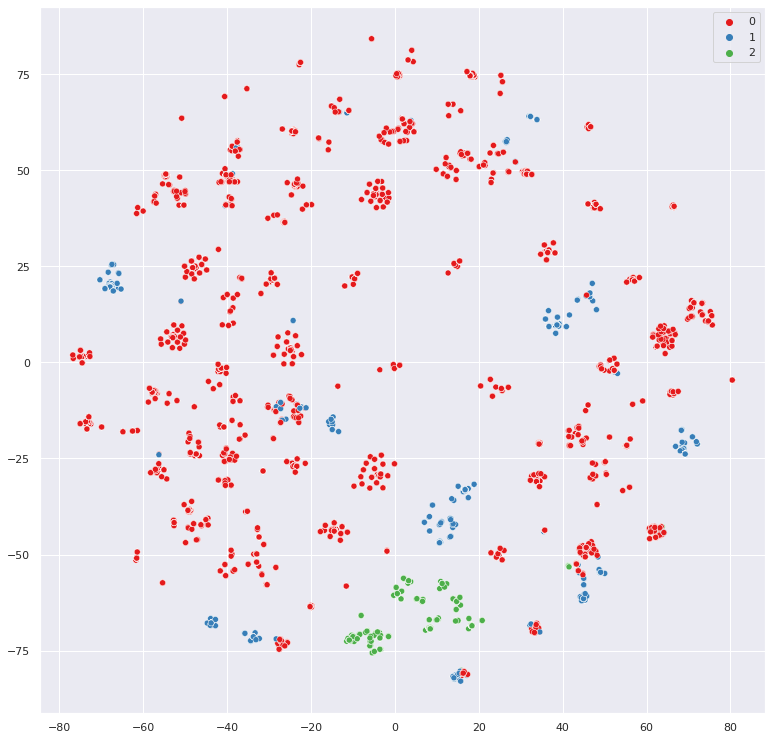

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=vizu[:, 0],
               y=vizu[:, 1],
               hue=model.labels_,
               palette=sns.color_palette('Set1', 3))

###Clusterizando (KMeans) com 20 ao inves de 3 grupos, e transformando em dataframe para plotar

In [ ]:
model1 = KMeans(n_clusters=20)

model1.fit(scaler_genre)

group1 = pd.DataFrame(model1.cluster_centers_,
            columns=genre.columns)

group1.head(10)

,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,-0.279805,-0.187489,-0.030039,2.431530,-0.323699,-0.017485,-0.077760,-0.253536,0.687624,-0.068630,-0.064061,-0.298830,-0.261772,-0.249633,-0.124719,-0.349055,-0.291059,-0.155534,-0.103101,-0.125503,-0.131543
1,0.485220,-0.187489,-0.030039,-0.312873,-0.323699,-0.516075,-0.077760,-0.343331,0.359933,-0.068630,-0.064061,-0.359585,-0.261772,-0.249633,1.998724,-0.321246,-0.342081,-0.259826,-0.103101,-0.125503,-0.131543
2,0.246344,-0.187489,-0.030039,-0.054688,3.089292,-0.261345,-0.077760,-0.328312,0.599558,-0.068630,-0.064061,-0.171657,-0.257075,-0.249633,0.267511,-0.208515,-0.112866,-0.245843,-0.103101,-0.125503,-0.131543
3,-0.502384,-0.187489,-0.030039,-0.411264,-0.323699,1.445577,-0.077760,-0.336763,-0.288930,-0.068630,-0.064061,-0.359585,-0.261772,-0.249633,-0.451272,-0.349055,-0.342081,-0.260965,-0.103101,-0.125503,-0.131543
4,-0.464158,-0.163300,-0.030039,-0.146600,-0.293793,-0.577056,-0.077760,2.665584,-0.793947,-0.068630,-0.064061,-0.345826,-0.217064,0.426217,-0.461999,-0.327934,-0.317045,3.556528,-0.103101,-0.125503,-0.131543
5,0.491024,5.333647,-0.030039,-0.160115,-0.233883,0.176028,-0.077760,-0.319537,-0.807144,-0.068630,-0.064061,-0.300552,2.523423,0.046334,-0.434555,-0.258437,0.566330,-0.151326,-0.103101,-0.125503,-0.131543
6,0.847558,-0.167557,-0.030039,-0.195745,1.278066,-0.352260,-0.077760,-0.315519,-0.180672,-0.068630,-0.064061,-0.268883,-0.129148,-0.049915,-0.319883,-0.035784,-0.200621,-0.239610,-0.103101,-0.125503,7.602073
7,-0.502384,-0.187489,-0.030039,-0.411264,-0.323699,-0.690792,-0.077760,0.285177,0.521384,-0.068630,-0.064061,-0.359585,-0.261772,-0.249633,-0.500319,-0.349055,-0.342081,-0.281173,-0.103101,-0.125503,-0.131543
8,0.419986,-0.132278,-0.030039,0.157295,0.631939,-0.029189,12.860016,-0.266775,-0.383893,-0.068630,-0.064061,0.990858,-0.139316,0.090809,0.049470,-0.349055,0.637530,-0.050911,-0.103101,-0.044568,0.177802
9,-0.438464,-0.116705,-0.030039,0.098981,0.245133,-0.499952,-0.077760,1.085109,0.148695,14.570782,-0.064061,-0.359585,-0.104777,0.132273,-0.436241,-0.225442,-0.174626,1.047262,0.399580,-0.021740,-0.131543


####Plotando

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f751876a950>,
      dtype=object)

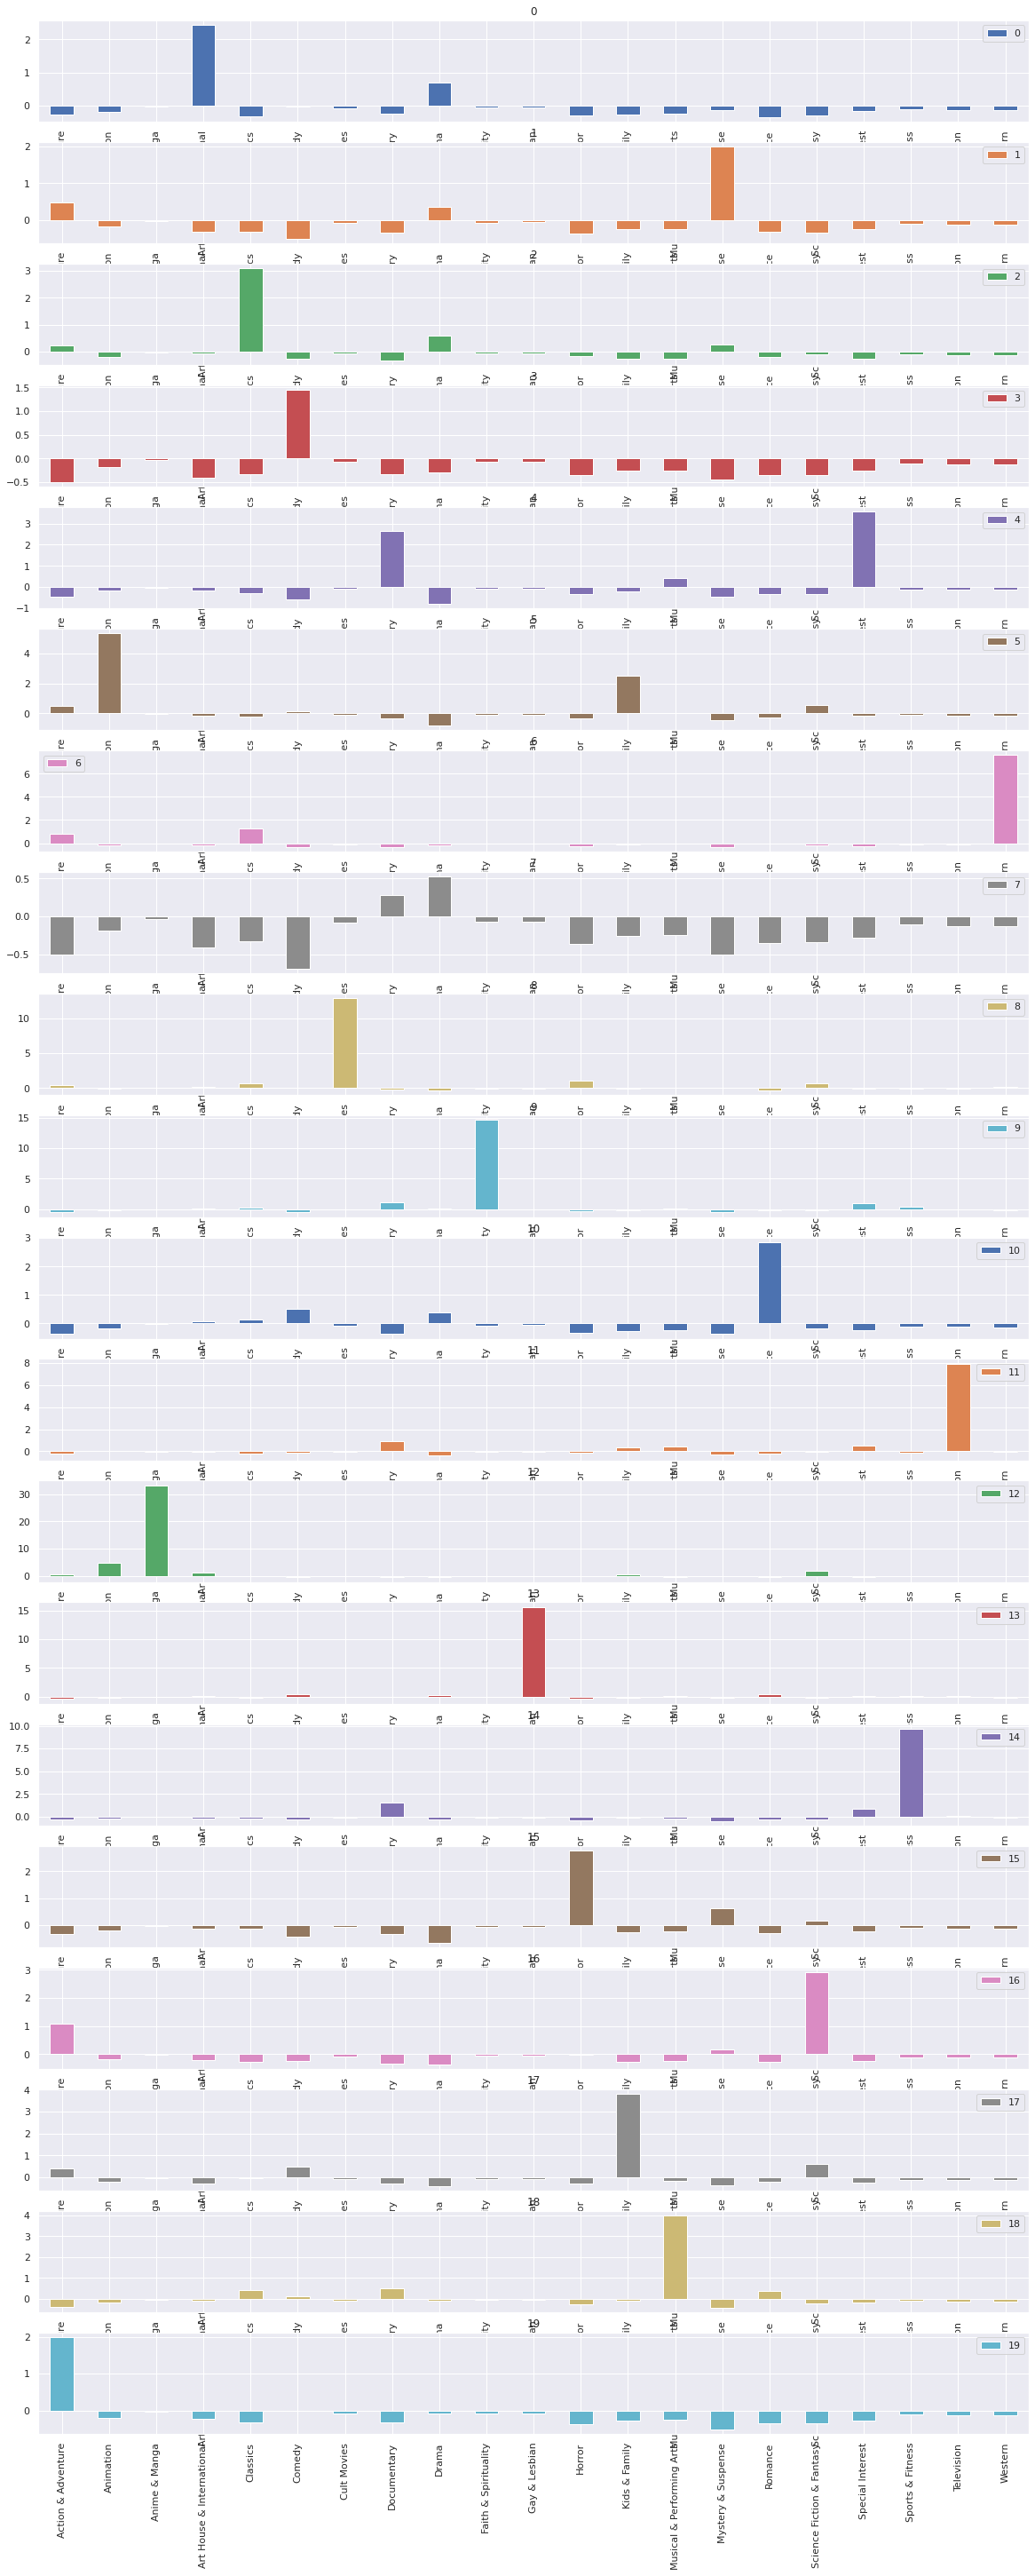

In [ ]:
group1.transpose().plot.bar(subplots=True,
               figsize=(20, 50),
               sharex=False,
               rot=90)


In [ ]:
group = 2

filter_cluster = model1.labels_ == group

movies_conc[filter_cluster].sample(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
510,Invaders from Mars,Originating during the science-fiction/Red-Sca...,NaN,NR,"Classics,Science Fiction & Fantasy",William Cameron Menzies,"John Tucker Battle, William Cameron Menzies, R...","Arthur Franz, Helena Carter, Leif Erickson, Ji...",1953-04-22,1999-01-07,78.0,20th Century Fox Film Corporation,Fresh,82,11,55.0,2758.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10288,The Naked Prey,In the bush country of South Africa in the lat...,NaN,R,"Action & Adventure,Classics,Drama","Cornel Wilde, Sven Persson","Clint Johnson, Don Peters","Cornel Wilde, Ken Gampu, Gert Van Der Bergh, G...",1966-01-01,2008-01-15,96.0,Paramount Home Video,Fresh,86,14,79.0,1643.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
14798,The River,Three teenage girls are living in Bengali (Ind...,Jean Renoir's first film shot in color takes f...,NR,"Classics,Drama",Jean Renoir,"Jean Renoir, Rumer Godden","Nora Swinburne, Esmond Knight, Arthur Shields,...",1959-09-10,2005-03-01,99.0,Criterion Collection,Fresh,91,23,79.0,2081.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
11765,Return of the Dragon (The Way of the Dragon),Bruce Lee's pre-Enter the Dragon outing is a s...,NaN,R,"Action & Adventure,Art House & International,C...",Bruce Lee,Bruce Lee,"Bruce Lee, Nora Miao, Chuck Norris, Malisa Lon...",1974-08-07,2001-07-03,90.0,Bryanston Distributing,Fresh,89,9,86.0,48444.0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12647,Slaughterhouse-Five,"""Billy Pilgrim has come unstuck in time."" Thes...",NaN,R,"Classics,Comedy,Drama,Science Fiction & Fantasy",George Roy Hill,Stephen Geller,"Michael Sacks, Valerie Perrine, Ron Leibman, E...",1972-03-15,2000-10-10,104.0,Universal Pictures,Fresh,77,13,67.0,6220.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
15068,The Whole Town's Talking,Edward G. Robinson plays a meek hardware clerk...,NaN,NR,"Classics,Comedy,Drama",John Ford,"Jo Swerling, W.R. Burnett, Robert Riskin","Edward G. Robinson, Jean Arthur, Arthur Hohl, ...",1935-02-22,1998-04-21,95.0,Columbia Pictures,Fresh,100,10,78.0,386.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9956,Monsieur Verdoux,"In this controversial ""comedy of murders,"" Cha...",Charles Chaplin adds an undercurrent of malice...,NR,"Classics,Comedy,Drama,Special Interest",Charles Chaplin,Charles Chaplin,"Charles Chaplin, Martha Raye, Isobel Elsom, Ma...",1947-04-11,2000-05-16,125.0,Criterion Collection,Fresh,97,32,88.0,5461.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
565,The Lost Patrol,"In this film, sergeant Victor McLaglen is in c...",NaN,NR,"Action & Adventure,Classics,Drama",John Ford,"Garrett Fort, Garrett Elsden Fort, Dudley Nichols","Victor McLaglen, Boris Karloff, Wallace Ford, ...",1934-02-16,2006-06-06,66.0,Media Home Entertainment,Fresh,100,6,66.0,438.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7227,Hell Is for Heroes,Don Siegel's only war film and unfortunately h...,NaN,NR,"Action & Adventure,Classics,Drama",Don Siegel,"Robert Pirosh, Richard Carr","Steve McQueen, Bobby Darin, Fess Parker, Bob N...",1962-06-26,2001-05-22,89.0,Paramount Pictures,Fresh,83,6,75.0,2032.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
702,Separate Tables,"Based on Terence Rattigan's play, Separate Tab...",NaN,G,"Classics,Drama",Delbert Mann,"John Gay, Terence Rattigan","David Niven, Wendy Hiller, Rita Hayworth, Burt...",1958-12-18,2001-12-11,100.0,MGM Home Entertainment,Fresh,73,15,77.0,1340.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


##Como definir a quantidade de grupos ideal

In [ ]:
def kmeans(number_clusters, genre):
  model = KMeans(n_clusters=number_clusters)
  model.fit(genre)
  return [number_clusters, model.inertia_]

###Erro medio ao quadrado (inertia)

In [ ]:
kmeans(20, scaler_genre)

# 92757 é ruim é bom para erro?

[20, 87468.40424636875]

In [ ]:
kmeans(3, scaler_genre)

[3, 298719.3126953689]

###Com quantos clusters temos o melhor erro??? 

Abaixo vamos treinar com Kmeans para varios numeros de clusters

In [ ]:
result = [kmeans(number_clusters, scaler_genre) for number_clusters in range(1, 41)]
result

[[1, 349398.0],
 [2, 327707.584176921],
 [3, 300080.30597051163],
 [4, 282437.3838508881],
 [5, 263734.39769099944],
 [6, 250718.032811492],
 [7, 230034.3493688276],
 [8, 216741.93917766228],
 [9, 202435.28497888887],
 [10, 185383.45735559132],
 [11, 165808.70544101446],
 [12, 153196.31438406394],
 [13, 145496.07587683687],
 [14, 136318.69164984714],
 [15, 123544.95510607018],
 [16, 114097.44051378421],
 [17, 104983.55870741502],
 [18, 99226.09771806974],
 [19, 95216.16182013186],
 [20, 88823.86546143545],
 [21, 83326.58825362596],
 [22, 80262.24490330757],
 [23, 79116.20563743434],
 [24, 75210.37405928184],
 [25, 73581.03812668467],
 [26, 71268.83579301165],
 [27, 69594.03557818648],
 [28, 67325.76569902562],
 [29, 67067.86147660221],
 [30, 65156.890907320194],
 [31, 63018.60403631204],
 [32, 61993.876254501934],
 [33, 60939.55475042623],
 [34, 59914.22989473626],
 [35, 58673.70180557432],
 [36, 57118.423531125],
 [37, 56348.46091646879],
 [38, 55842.31090090889],
 [39, 53988.81332523

###Colocando em Dataframe

In [ ]:
result = pd.DataFrame(result, 
            columns=['clusters', 'inertia'])
result

,clusters,inertia
0,1,349398.000000
1,2,327707.584177
2,3,300080.305971
3,4,282437.383851
4,5,263734.397691
5,6,250718.032811
6,7,230034.349369
7,8,216741.939178
8,9,202435.284979
9,10,185383.457356


###Elbow method / Elbow point

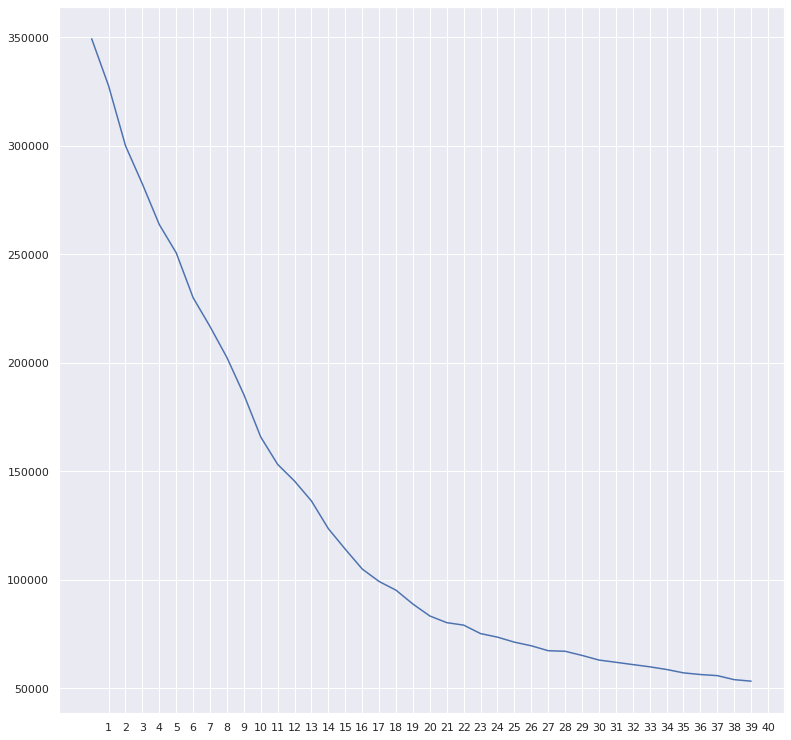

In [ ]:
result.inertia.plot(xticks=result.clusters)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7514dc7310>,
      dtype=object)

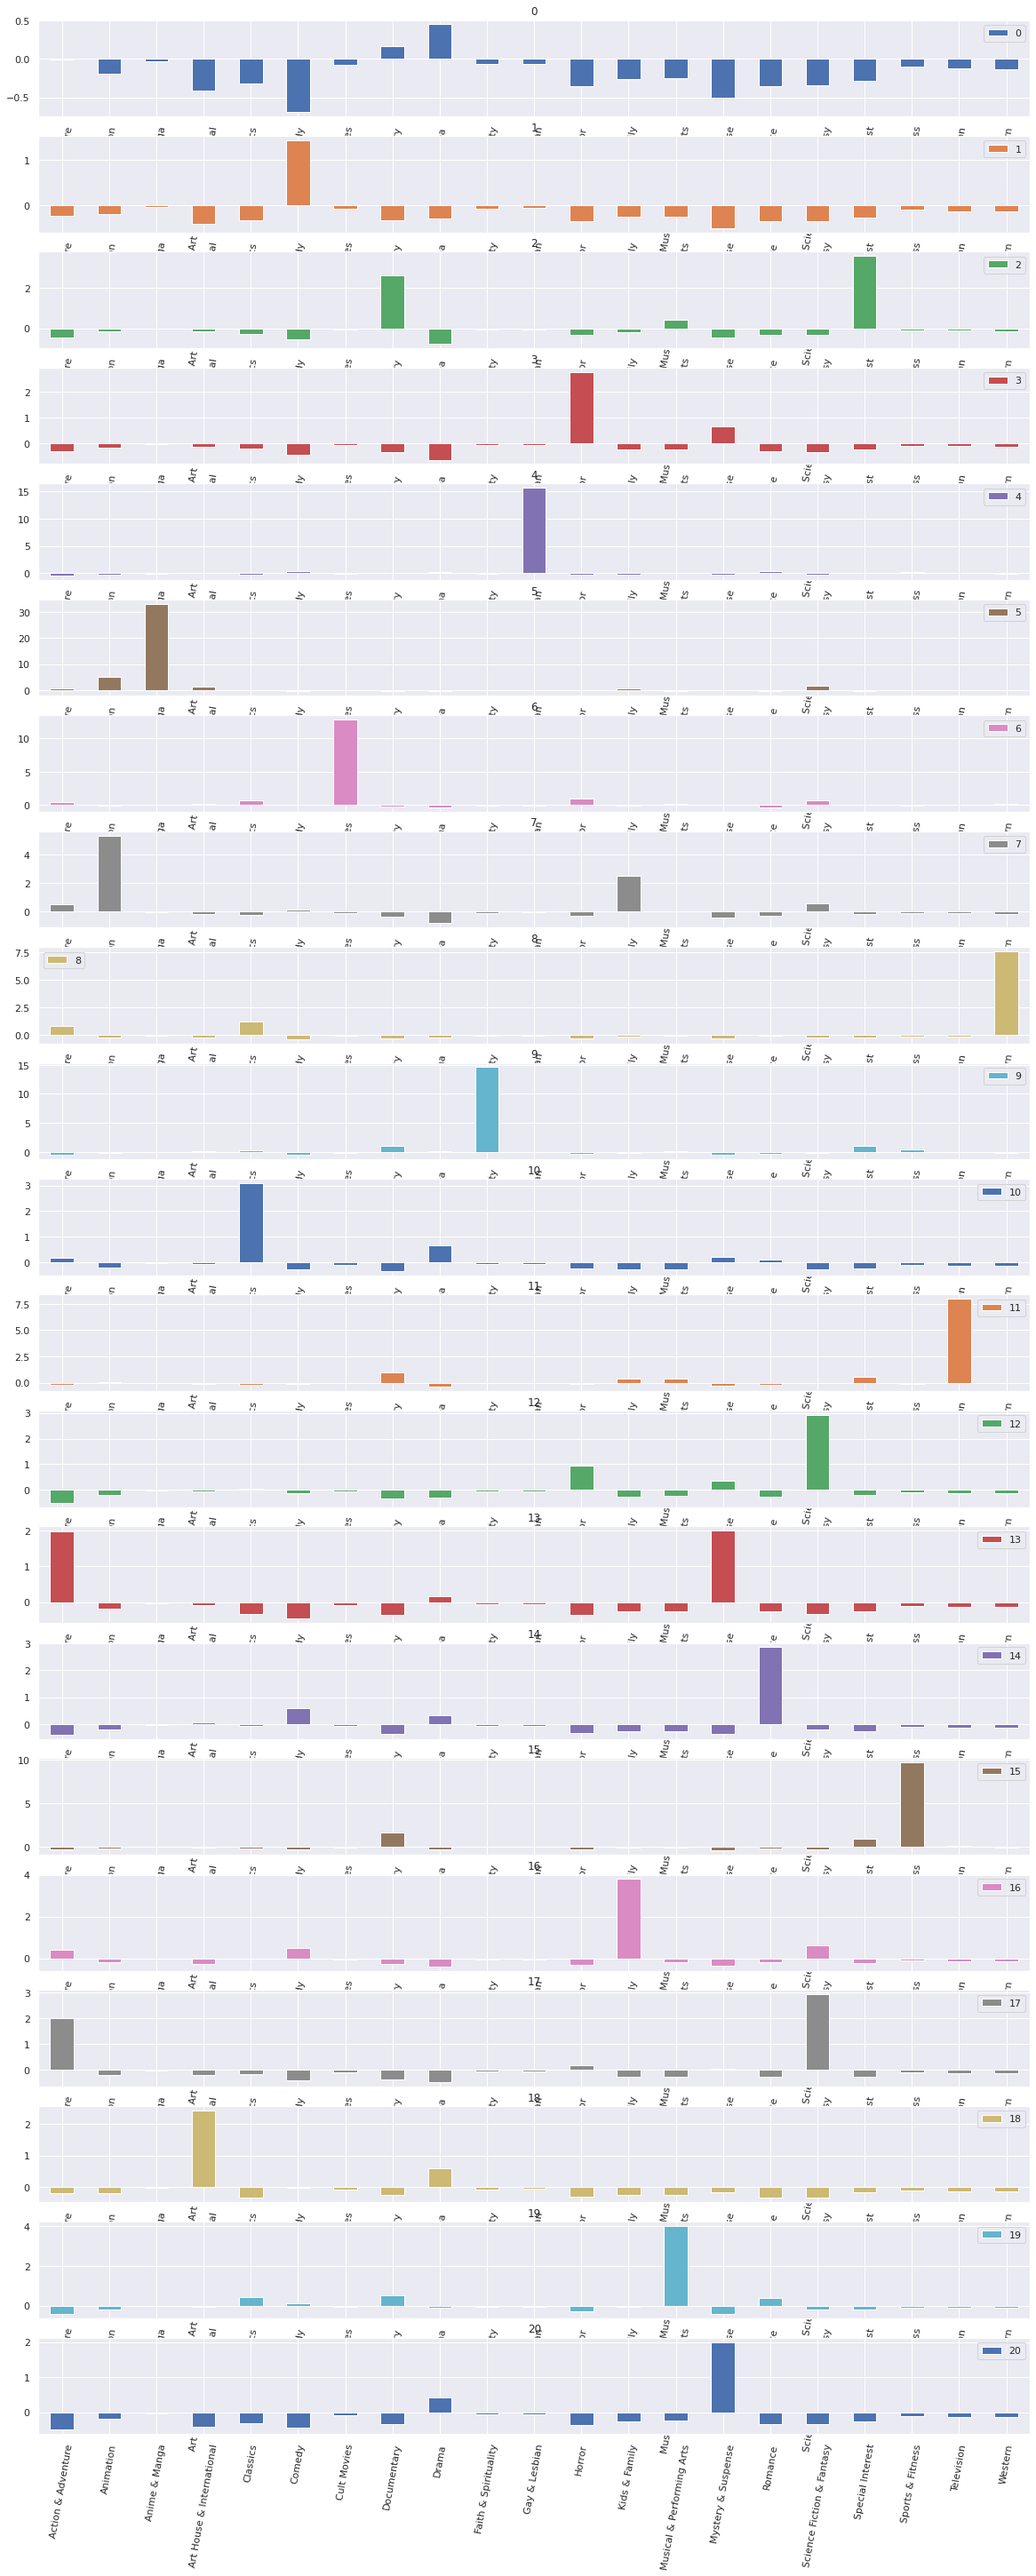

In [ ]:
model = KMeans(n_clusters=21)
model.fit(scaler_genre)

groups = pd.DataFrame(model.cluster_centers_,
            columns=genre.columns)

groups.transpose().plot.bar(subplots=True,
               figsize=(20, 50),
               sharex=False,
               rot=80)

In [ ]:
group_f = 20

filt = model.labels_ == group_f

movies_conc[filt].sample(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
5870,Extraction,When a terrorist group kidnaps retired CIA fie...,NaN,R,Mystery & Suspense,Steven C. Miller,"Max Adams, Umair Aleem","Bruce Willis, D.B. Sweeney, Dan Bilzerian, Gin...",2015-12-18,2016-02-23,96.0,Lionsgate Premiere,Rotten,6,18,17.0,1062.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2082,A Little Trip to Heaven,Three stories of human treachery are given an ...,NaN,R,"Comedy,Drama,Mystery & Suspense",Baltasar Kormákur,"Baltasar Kormákur, Edward Martin Weinman","Forest Whitaker, Julia Stiles, Jeremy Renner, ...",2007-03-13,2007-03-13,105.0,First Look Home Entertainment,Rotten,33,6,42.0,2475.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
8158,Jennifer 8,Stressed out LA detective John Berlin gets too...,NaN,R,"Drama,Mystery & Suspense",Bruce Robinson,Bruce Robinson,"Andy Garcia, Uma Thurman, Lance Henriksen, Kat...",1992-11-06,2000-04-11,125.0,Paramount Home Video,Rotten,37,19,36.0,6969.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
12100,Salvation Boulevard,Salvation Boulevard is a modern comedy based o...,NaN,R,"Comedy,Mystery & Suspense",George Ratliff,"George Ratliff, Doug Max Stone","Pierce Brosnan, Jennifer Connelly, Ed Harris, ...",2011-07-15,2012-09-18,95.0,IFC Films,Rotten,21,34,23.0,1325.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9008,The Limits of Control,"The story follows a mysterious loner, a strang...","A minimalist exercise in not much of anything,...",R,"Drama,Mystery & Suspense",Jim Jarmusch,Jim Jarmusch,"Hiam Abbass, Gael García Bernal, Paz de la Hue...",2009-05-01,2009-11-17,116.0,Focus Features,Rotten,43,126,43.0,34095.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
15434,Trafficked,"Inspired by real characters, three girls from ...",NaN,R,"Drama,Mystery & Suspense",Will Wallace,"Siddharth Kara, Siddharth Kara","Ashley Judd, Anne Archer, Elisabeth Röhm, Sean...",2017-10-06,2018-01-11,104.0,Epic Pictures,Rotten,17,6,67.0,104.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6240,Footprints,"Sybil Temtchine (Ten Benny, Passion of Ayn Ran...",NaN,PG-13,"Drama,Mystery & Suspense",Steven Peros,Steven Peros,"Sybil Temtchine, Jeris Poindexter, Charley Ros...",2011-04-15,2013-11-11,80.0,Paladin,Rotten,41,17,71.0,2161.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3633,Boarding Gate,From director Olivier Assayas comes this eroti...,Boarding Gate has little substance beneath its...,R,"Drama,Mystery & Suspense",Olivier Assayas,Olivier Assayas,"Asia Argento, Michael Madsen, Carl Ng, Kelly L...",2008-03-21,2008-06-03,106.0,Magnolia Pictures,Rotten,32,47,20.0,2371.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1891,2 Days in the Valley,"A variety of crooks, losers, and working stiff...",A labyrinthine thriller with a host of memorab...,R,"Comedy,Drama,Mystery & Suspense",John Herzfeld,John Herzfeld,"Danny Aiello, Greg Cruttwell, James Spader, Te...",1996-09-27,2001-08-07,107.0,HBO Video,Rotten,59,54,54.0,14754.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
10488,"No God, No Master",When a series of package bombs show up on the ...,NaN,PG-13,"Drama,Mystery & Suspense",Terry Green,Terry Green,"David Strathairn, Ray Wise, Sam Witwer, Alessa...",2014-04-11,2014-05-19,94.0,Monterey Media Inc.,Fresh,73,15,47.0,296.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


###Agrupamento hierarquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters=21)
group = model.fit_predict(scaler_genre)
group

array([ 4,  3, 14, ...,  2,  2, 18])

In [ ]:
tsne = TSNE()
vizu = tsne.fit_transform(scaler_genre)
vizu

array([[-55.698353 ,   6.6985726],
       [ 14.278282 ,   3.9258928],
       [ 23.13504  , -52.66056  ],
       ...,
       [ 46.58488  ,  34.174255 ],
       [ 57.48617  ,   5.7320757],
       [  7.0757437, -72.91181  ]], dtype=float32)

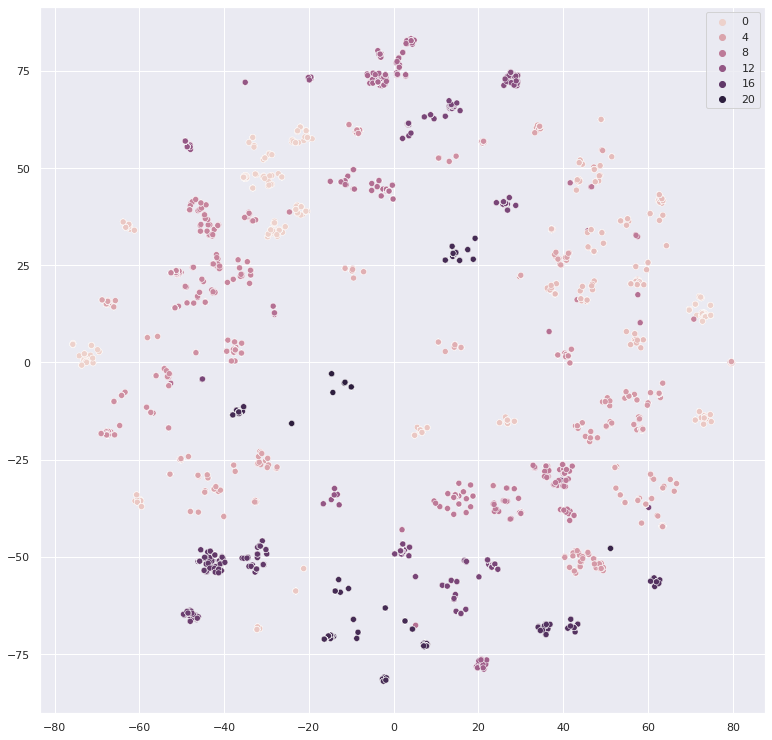

In [ ]:
sns.scatterplot(x=vizu[:, 0],
               y=vizu[:, 1],
               hue=group)

###Plotando um dendrograma

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7510dded90>,
      dtype=object)

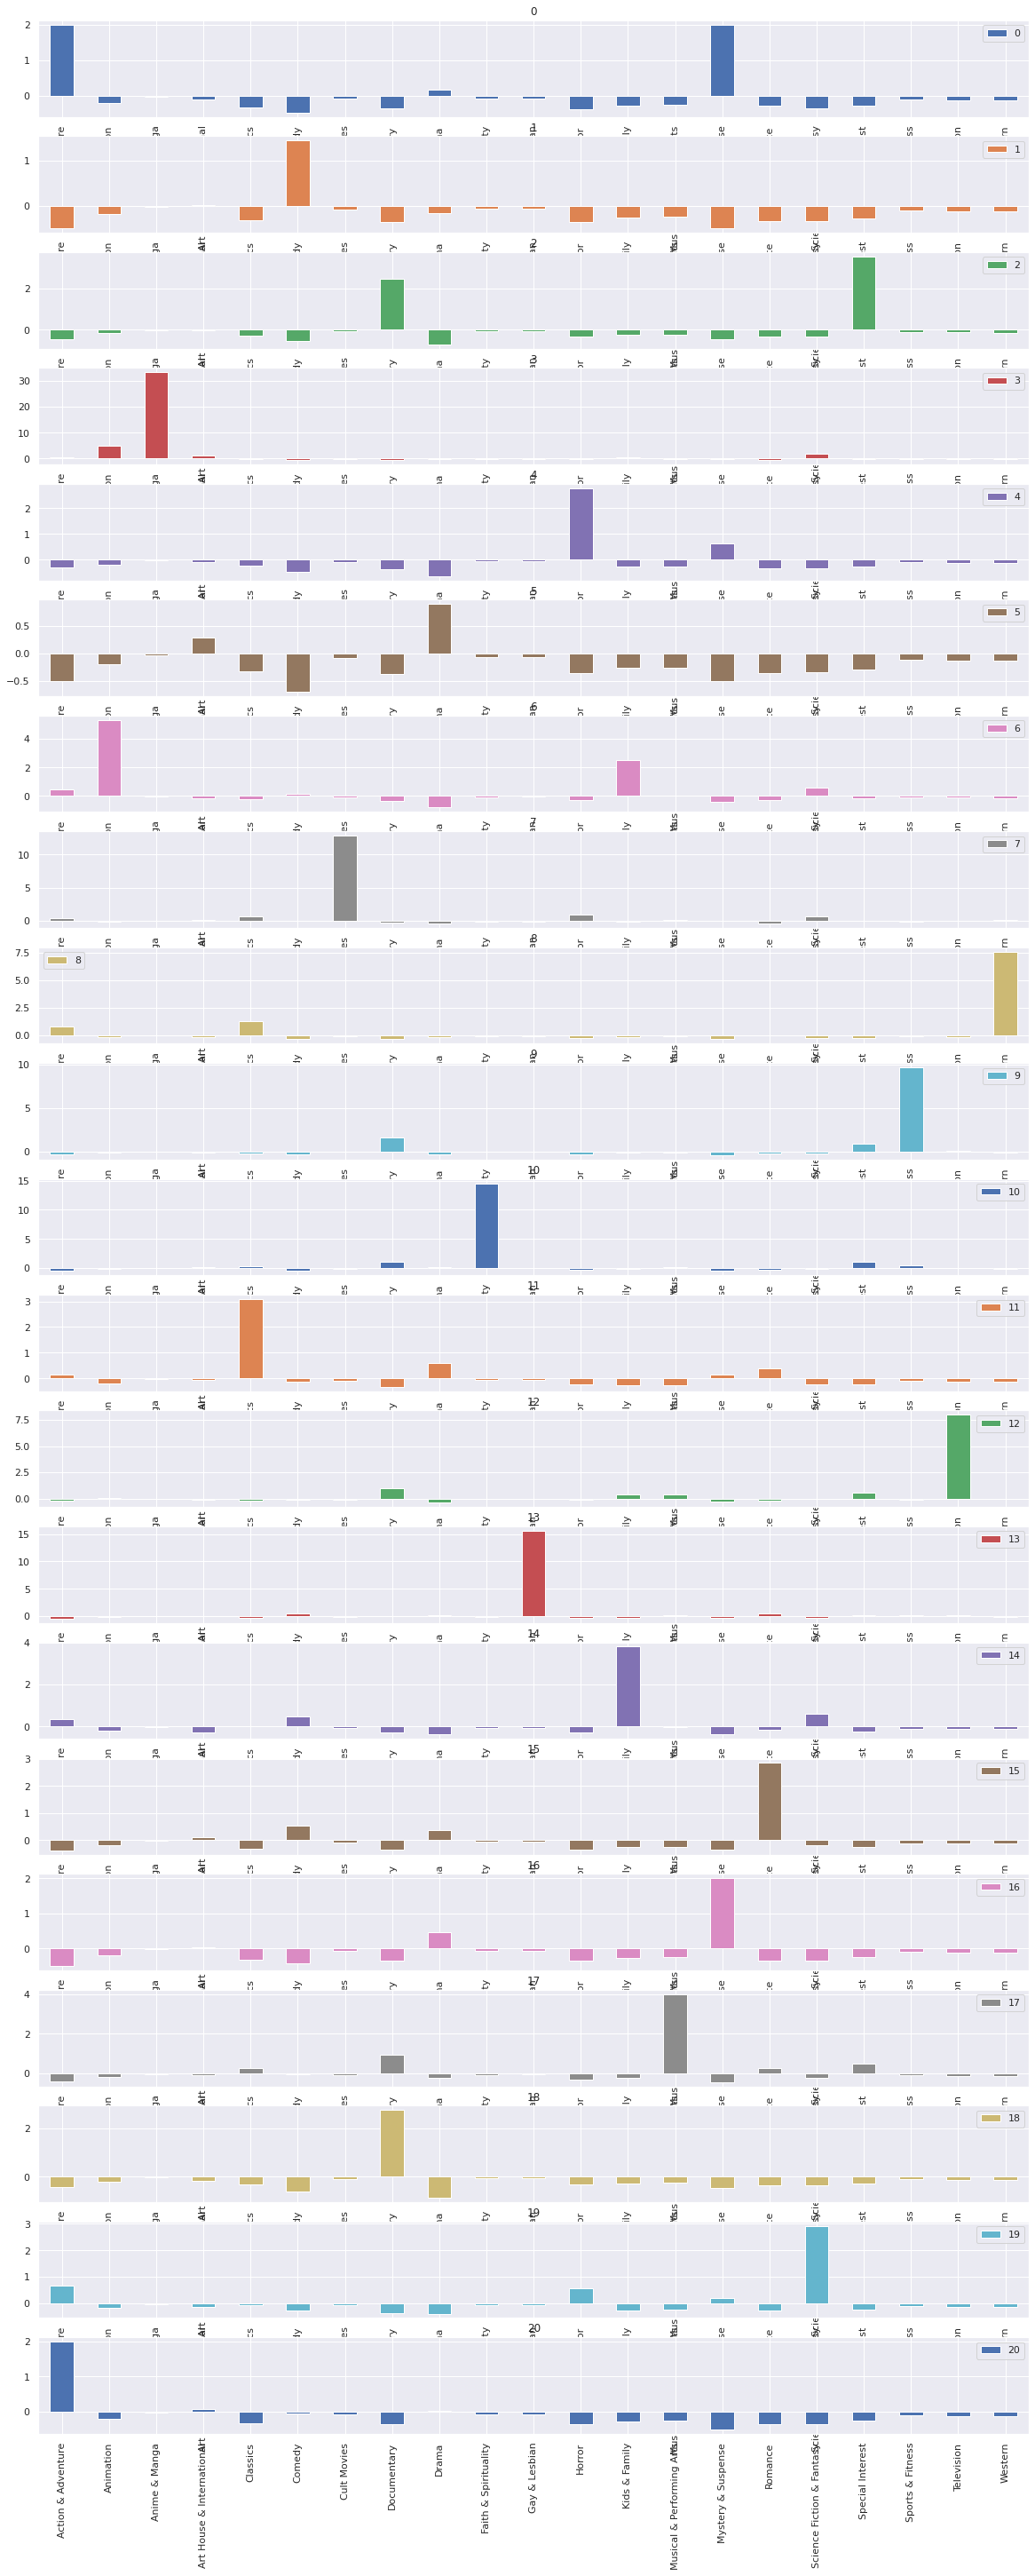

In [ ]:
# Executando novamente KMeans para recarregar as variaveis que foram utilizadas varias vezes

model = KMeans(n_clusters=21)
model.fit(scaler_genre)

groups = pd.DataFrame(model.cluster_centers_,
            columns=genre.columns)

groups.transpose().plot.bar(subplots=True,
               figsize=(20, 50),
               sharex=False,
               rot=90)

In [ ]:
# Visualizando o Dataframe
groups

,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,-0.502384,-0.187489,-0.030039,-0.411264,-0.323699,-0.690792,-0.077760,0.285177,0.521384,-0.068630,-0.064061,-0.359585,-0.261772,-0.249633,-0.500319,-0.349055,-0.342081,-0.281173,-0.103101,-0.125503,-0.131543
1,-0.204752,-0.187489,-0.030039,2.431530,-0.323699,-0.026745,-0.077760,-0.256484,0.618518,-0.068630,-0.064061,-0.300501,-0.261772,-0.249633,-0.173021,-0.349055,-0.294825,-0.175650,-0.103101,-0.125503,-0.131543
2,-0.301701,-0.187489,-0.030039,-0.132023,-0.207748,-0.450249,-0.077760,-0.346875,-0.649053,-0.068630,-0.064061,2.780982,-0.258758,-0.249633,0.666147,-0.315824,-0.342081,-0.244327,-0.103101,-0.125503,-0.131543
3,1.990508,-0.187489,-0.030039,-0.411264,-0.323699,-0.019878,-0.077760,-0.310354,-0.010837,-0.068630,-0.064061,-0.359585,-0.261772,-0.249633,-0.500319,-0.349055,-0.342081,-0.262175,-0.103101,-0.125503,-0.131543
4,-0.223180,0.077526,-0.030039,-0.081500,-0.187179,-0.084760,-0.077760,0.954981,-0.395934,-0.068630,-0.064061,-0.146027,0.358674,0.414228,-0.300396,-0.233353,-0.054728,0.532420,-0.103101,7.967959,-0.069674
5,-0.429064,-0.187489,-0.030039,0.090406,-0.273508,0.439769,-0.077760,0.007797,0.212261,-0.068630,15.610140,-0.313400,-0.261772,0.125854,-0.243065,0.454428,-0.246040,0.113884,0.185201,0.112540,-0.131543
6,0.492895,5.333647,-0.030039,-0.159642,-0.233714,0.173637,-0.077760,-0.325359,-0.810397,-0.068630,-0.064061,-0.300441,2.528668,0.046891,-0.434431,-0.264319,0.568041,-0.158309,-0.103101,-0.125503,-0.131543
7,0.494773,4.965571,33.289638,1.294413,-0.096166,-0.549276,-0.077760,-0.360757,-0.283551,-0.068630,-0.064061,-0.150214,0.554604,-0.249633,-0.167114,-0.349055,1.834832,-0.281173,-0.103101,-0.125503,-0.131543
8,-0.310623,-0.187489,-0.030039,-0.158945,-0.202527,-0.337649,-0.077760,1.585601,-0.302550,-0.068630,-0.064061,-0.359585,-0.116854,-0.148910,-0.441170,-0.272986,-0.284115,0.899658,9.699190,0.066059,-0.131543
9,-0.438464,-0.116705,-0.030039,0.098981,0.245133,-0.499952,-0.077760,1.085109,0.148695,14.570782,-0.064061,-0.359585,-0.104777,0.132273,-0.436241,-0.225442,-0.174626,1.047262,0.399580,-0.021740,-0.131543


### Linkando os clusters fazendo hierarquia

In [ ]:
distance_matrix = linkage(groups)
distance_matrix

array([[ 0.        , 15.        ,  2.36461365,  2.        ],
       [14.        , 17.        ,  2.52920667,  2.        ],
       [ 3.        , 22.        ,  2.56710233,  3.        ],
       [21.        , 23.        ,  2.58961852,  5.        ],
       [ 1.        , 24.        ,  3.00629931,  6.        ],
       [11.        , 25.        ,  3.47733671,  7.        ],
       [ 2.        , 26.        ,  3.59661709,  8.        ],
       [18.        , 27.        ,  3.69148775,  9.        ],
       [19.        , 28.        ,  3.75752997, 10.        ],
       [20.        , 29.        ,  4.40945103, 11.        ],
       [16.        , 30.        ,  4.58124181, 12.        ],
       [10.        , 31.        ,  4.66222169, 13.        ],
       [ 6.        , 32.        ,  5.70491099, 14.        ],
       [12.        , 33.        ,  8.00524347, 15.        ],
       [ 4.        , 34.        ,  8.31324473, 16.        ],
       [ 8.        , 35.        , 10.00847455, 17.        ],
       [13.        , 36.

### Plotando o dendrograma

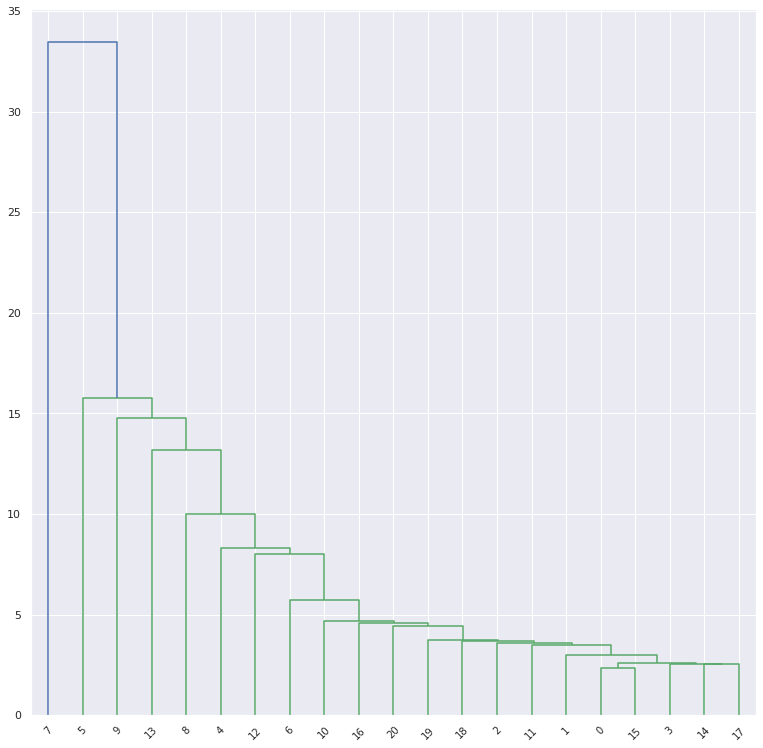

In [ ]:
dendrograma = dendrogram(distance_matrix)